In [1]:
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

In [2]:
data = pd.read_csv('dataset/cleaned_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14299 non-null  object
 1   label   14299 non-null  object
dtypes: object(2)
memory usage: 223.5+ KB


C:\Users\axioo\AppData\Local\Temp\ipykernel_15500\1281109729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x = data['label'], palette=cols)


Text(0, 0.5, 'Number of Text')

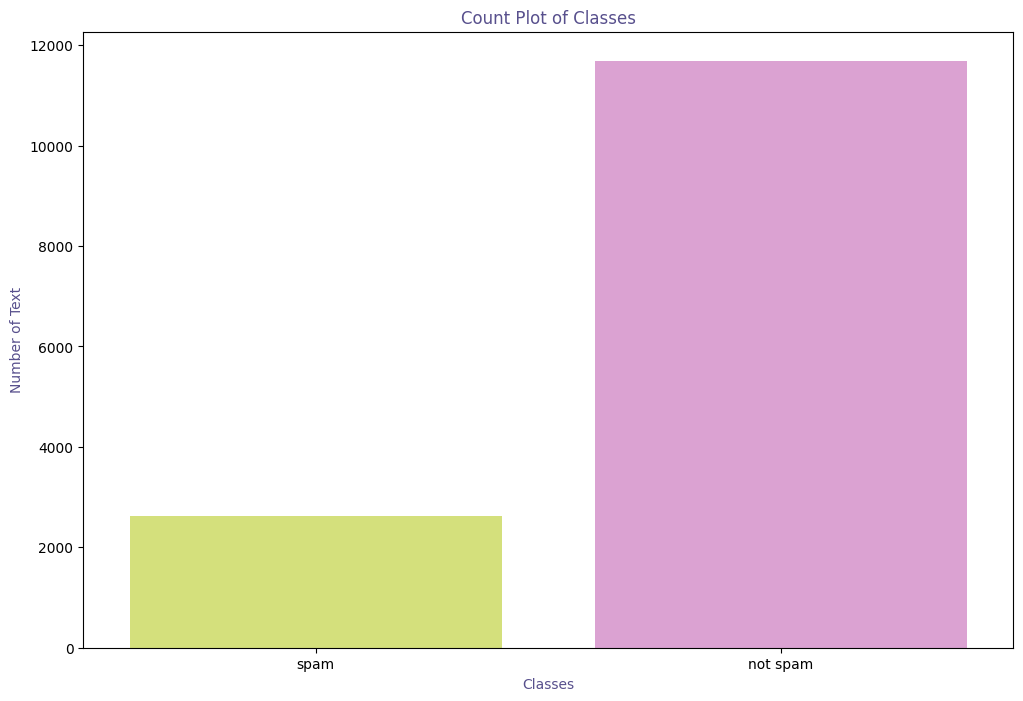

In [3]:
cols = ['#E1F16B', '#E598D8']
plt.figure(figsize=(12, 8))
fg = sns.countplot(x = data['label'], palette=cols)
fg.set_title('Count Plot of Classes', color = '#58508d')
fg.set_xlabel('Classes', color = '#58508d')
fg.set_ylabel('Number of Text', color = '#58508d')

In [4]:
data['No_of_Characters'] = data['text'].apply(len)
data['No_of_Words'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis = 1).apply(len)
data['No_of_Sentence'] = data.apply(lambda row: nltk.sent_tokenize(row['text']), axis = 1).apply(len)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,14299.0,948.168823,2688.675130,1.0,83.0,363.0,1100.5,200408.0
No_of_Words,14299.0,187.420939,394.881179,0.0,19.0,72.0,221.0,13309.0
No_of_Sentence,14299.0,8.795510,24.385846,0.0,1.0,2.0,9.0,1565.0


<Figure size 1200x800 with 0 Axes>

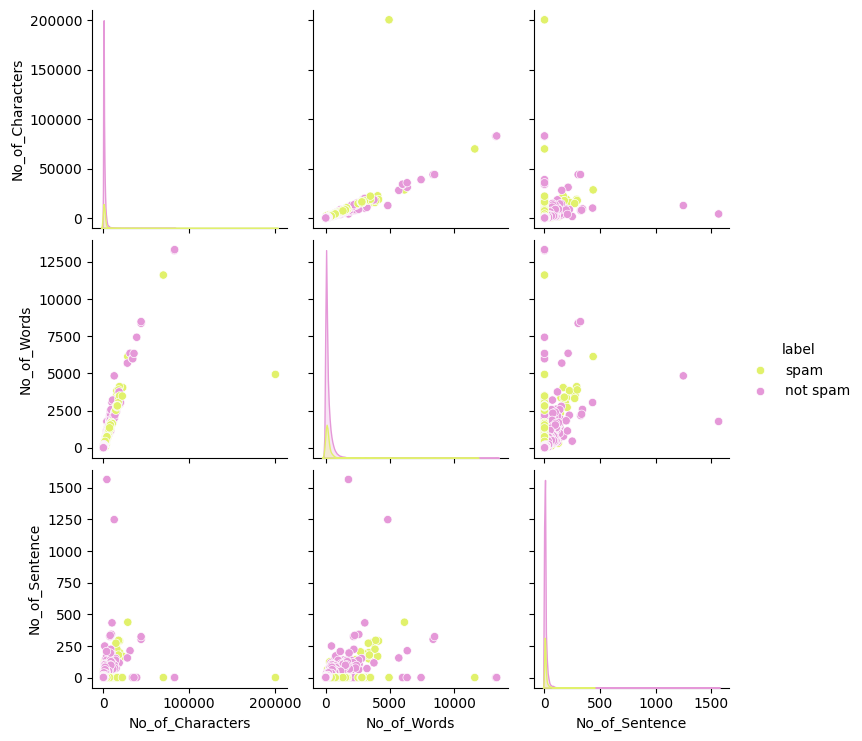

In [5]:
plt.figure(figsize=(12, 8))
fg = sns.pairplot(data=data, hue='label', palette=cols)
plt.show(fg)

In [6]:
data = data[(data['No_of_Characters']<350)]
data.shape

(7068, 5)

<Figure size 1200x800 with 0 Axes>

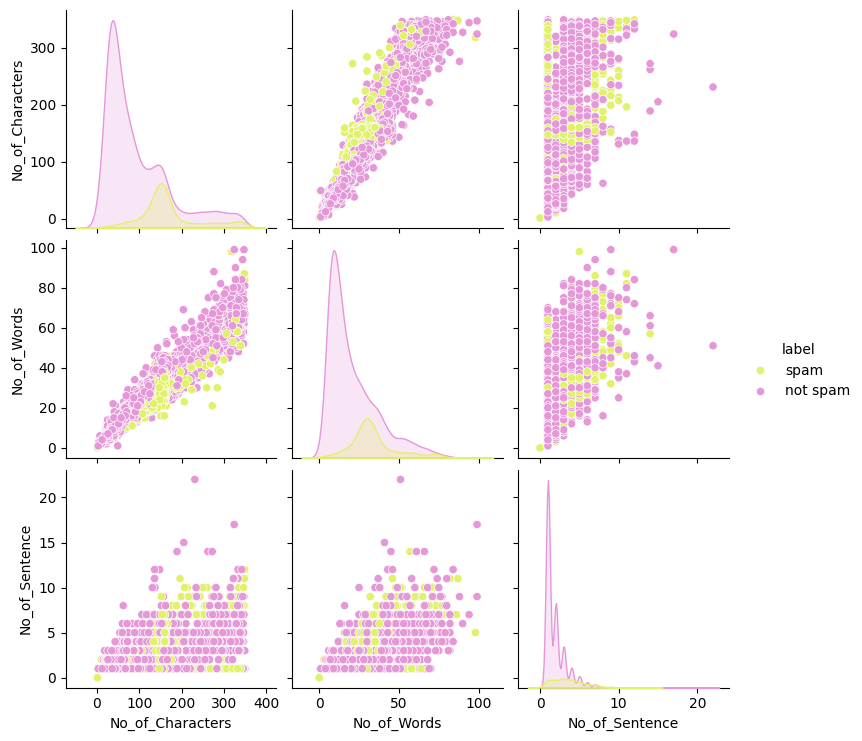

In [7]:
plt.figure(figsize=(12, 8))
fg = sns.pairplot(data=data, hue='label', palette=cols)
plt.show(fg)

In [8]:
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*data["text"][:5], sep = "\n")

 The First 5 Texts:
 do not have money , get software cds from here !  software compatibility . . . . ain ' t it great ?  grow old along with me the best is yet to be .  all tradgedies are finish ' d by death . all comedies are ended by marriage .
 only our software is guaranteed 100 % legal .  name - brand software at low , low , low , low prices  everything comes to him who hustles while he waits .  many would be cowards if they had courage enough .
 security alert - confirm your national credit union information  - - > 
 any med for your girl to be happy !  your girl is unsatisfied with your potency ? don ' t wait until she finds another men !  click here to choose from a great variety of llcensed love t @ bs ! best pri $ es , fast shippinq and guaranteed effect ! here you buy it riqht from warehouse !  the store is verified by bbb and approved by visa ! 
 your trusted source for prescription medication .  best prescription generic meds 4 less .  anger is one of the sinners of the s

In [9]:
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data["Clean_Text"] = data["text"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*data["Clean_Text"][:5], sep = "\n")

 The First 5 Texts after cleaning:
do not have money get software cds from here software compatibility ain t it great grow old along with me the best is yet to be all tradgedies are finish d by death all comedies are ended by marriage
only our software is guaranteed legal name brand software at low low low low prices everything comes to him who hustles while he waits many would be cowards if they had courage enough
security alert confirm your national credit union information
any med for your girl to be happy your girl is unsatisfied with your potency don t wait until she finds another men click here to choose from a great variety of llcensed love t bs best pri es fast shippinq and guaranteed effect here you buy it riqht from warehouse the store is verified by bbb and approved by visa
your trusted source for prescription medication best prescription generic meds less anger is one of the sinners of the soul write what you like there is no other rule life s most urgent question is what a

In [10]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*data["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['do', 'not', 'have', 'money', 'get', 'software', 'cds', 'from', 'here', 'software', 'compatibility', 'ain', 't', 'it', 'great', 'grow', 'old', 'along', 'with', 'me', 'the', 'best', 'is', 'yet', 'to', 'be', 'all', 'tradgedies', 'are', 'finish', 'd', 'by', 'death', 'all', 'comedies', 'are', 'ended', 'by', 'marriage']
['only', 'our', 'software', 'is', 'guaranteed', 'legal', 'name', 'brand', 'software', 'at', 'low', 'low', 'low', 'low', 'prices', 'everything', 'comes', 'to', 'him', 'who', 'hustles', 'while', 'he', 'waits', 'many', 'would', 'be', 'cowards', 'if', 'they', 'had', 'courage', 'enough']
['security', 'alert', 'confirm', 'your', 'national', 'credit', 'union', 'information']
['any', 'med', 'for', 'your', 'girl', 'to', 'be', 'happy', 'your', 'girl', 'is', 'unsatisfied', 'with', 'your', 'potency', 'don', 't', 'wait', 'until', 'she', 'finds', 'another', 'men', 'click', 'here', 'to', 'choose', 'from', 'a', 'great', 'variety', 'of', 'llcensed', 'lov

In [11]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['money', 'get', 'software', 'cds', 'software', 'compatibility', 'great', 'grow', 'old', 'along', 'best', 'yet', 'tradgedies', 'finish', 'death', 'comedies', 'ended', 'marriage']
['software', 'guaranteed', 'legal', 'name', 'brand', 'software', 'low', 'low', 'low', 'low', 'prices', 'everything', 'comes', 'hustles', 'waits', 'many', 'would', 'cowards', 'courage', 'enough']
['security', 'alert', 'confirm', 'national', 'credit', 'union', 'information']
['med', 'girl', 'happy', 'girl', 'unsatisfied', 'potency', 'wait', 'finds', 'another', 'men', 'click', 'choose', 'great', 'variety', 'llcensed', 'love', 'bs', 'best', 'pri', 'es', 'fast', 'shippinq', 'guaranteed', 'effect', 'buy', 'riqht', 'warehouse', 'store', 'verified', 'bbb', 'approved', 'visa']
['trusted', 'source', 'prescription', 'medication', 'best', 'prescription', 'generic', 'meds', 'less', 'anger', 'one', 'sinners', 'soul', 'write', 'like', 'rule', 'life', 'urgent', 'question', 'oth

In [12]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemitization:
['money', 'get', 'software', 'cds', 'software', 'compatibility', 'great', 'grow', 'old', 'along', 'best', 'yet', 'tradgedies', 'finish', 'death', 'comedies', 'end', 'marriage']
['software', 'guarantee', 'legal', 'name', 'brand', 'software', 'low', 'low', 'low', 'low', 'price', 'everything', 'come', 'hustle', 'wait', 'many', 'would', 'cowards', 'courage', 'enough']
['security', 'alert', 'confirm', 'national', 'credit', 'union', 'information']
['med', 'girl', 'happy', 'girl', 'unsatisfied', 'potency', 'wait', 'find', 'another', 'men', 'click', 'choose', 'great', 'variety', 'llcensed', 'love', 'bs', 'best', 'pri', 'es', 'fast', 'shippinq', 'guarantee', 'effect', 'buy', 'riqht', 'warehouse', 'store', 'verify', 'bbb', 'approve', 'visa']
['trust', 'source', 'prescription', 'medication', 'best', 'prescription', 'generic', 'meds', 'less', 'anger', 'one', 'sinners', 'soul', 'write', 'like', 'rule', 'life', 'urgent', 'question', 'others', 'gold', 'friends',

In [13]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
money get software cds software compatibility great grow old along best yet tradgedies finish death comedies end marriage
software guarantee legal name brand software low low low low price everything come hustle wait many would cowards courage enough
security alert confirm national credit union information
med girl happy girl unsatisfied potency wait find another men click choose great variety llcensed love bs best pri es fast shippinq guarantee effect buy riqht warehouse store verify bbb approve visa
trust source prescription medication best prescription generic meds less anger one sinners soul write like rule life urgent question others gold friends lead foes


In [14]:
#Changing text data in to numbers. 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature 
X.dtype

dtype('float64')

In [15]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
data["label"] = label_encoder.fit_transform(data["label"])

In [16]:
y = data["label"] 
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours"}

In [18]:
# Cossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.932796 
RandomForest: 0.963391 
KNeighbours: 0.902547 


In [ ]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [ ]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours"\])

In [ ]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

In [ ]:
cmap = ListedColormap(["#E1F16B", "#E598D8"])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap= cmap,   
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()